Load all packages you need.

In [1]:
import pandas as pd

Read the dataset that you prepared yesterday afternoon (without outlier and missing data). 

In [7]:
#Eigene Lösung
df_self = pd.read_pickle(r"..\data\df_imputed_clean.pkl")
df_self.head()
df1 = df_self.drop(columns=['Mahalanobis_Distance','Multivariate_Outlier','Outlier'])
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,5.0,116.0,74.0,20.6,102.8,25.6,0.201,30.0,0.0


In [3]:
#Lösung der Seminarleiter
df_solution = pd.read_pickle(r"C:\Users\maxwi\Documents\GitHub\Applied-Analytics\Applied-Analytics\01_Monday\group_session1_solution.pkl")
df_solution.head()
#ACHTUNG: Outlierbewertung noch enthalten
df2 = df_solution.drop(columns=['log_DiabetesPedigreeFunction','log_Age','log_Pregnancies'])
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier_Tukey,outlier_z_score
0,6,148,72,35,70,33.6,0.627,50,1,False,False
1,1,85,66,29,285,26.6,0.351,31,0,False,False
2,8,183,64,43,150,23.3,0.672,32,1,False,False
3,1,89,66,23,94,28.1,0.167,21,0,False,False
4,0,137,40,35,168,43.1,2.288,33,1,True,True


Create a scatterplot for the variables "BMI" and "BloodPressure".

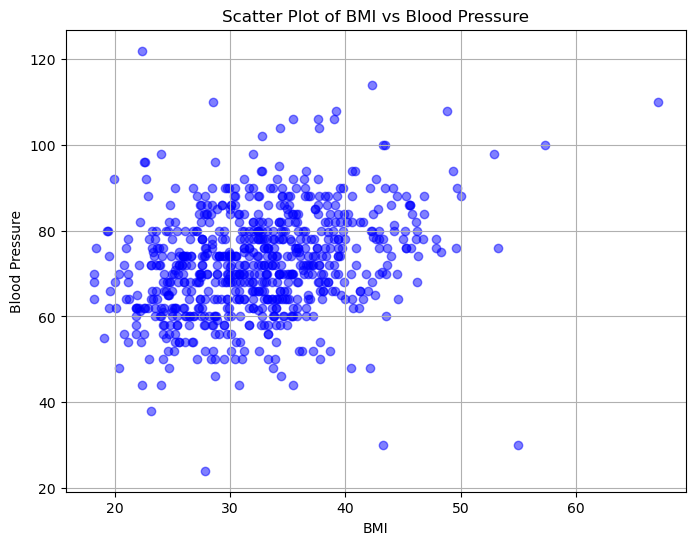

In [8]:
import matplotlib.pyplot as plt

# Scatter plot of BMI vs. BloodPressure
plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(df1['BMI'], df1['BloodPressure'], color='blue', alpha=0.5)

# Labels and title
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.title('Scatter Plot of BMI vs Blood Pressure')

# Show grid
plt.grid(True)

# Display the plot
plt.show()


We want to perform PCA on these two variables. But before we can do that, we need to normalize the data to avoid weighting the higher "BloodPressure" stronger than "BMI" values. If a variable is normally distributed (bell curve), a good way approach is z-score scaling. <br>
Inspect the histograms of both variables. If they are normally distributed create a dataframe with the normalized "BloodPressure_norm" and "BMI_norm". 

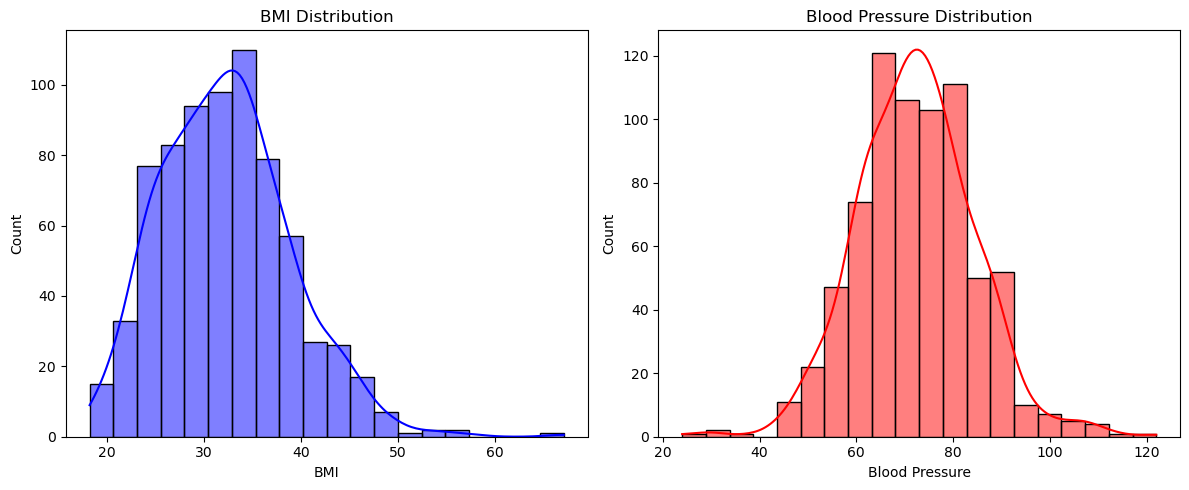

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms
plt.figure(figsize=(12, 5))

# Histogram for BMI
plt.subplot(1, 2, 1)
sns.histplot(df1['BMI'], bins=20, kde=True, color='blue')
plt.title('BMI Distribution')
plt.xlabel('BMI')

# Histogram for Blood Pressure
plt.subplot(1, 2, 2)
sns.histplot(df1['BloodPressure'], bins=20, kde=True, color='red')
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure')

plt.tight_layout()
plt.show()

In [ ]:
"""
from scipy.stats import zscore

df1['BMI_norm'] = zscore(df1['BMI'])
df1['BloodPressure_norm'] = zscore(df1['BloodPressure'])

# Create a new DataFrame with normalized values
df_normalized = df1[['BMI_norm', 'BloodPressure_norm']]
print(df_normalized.head())"
"""

   BMI_norm  BloodPressure_norm
0  0.195747           -0.024242
1 -0.845724           -0.518338
2 -1.336703           -0.683037
3 -0.622552           -0.518338
4 -0.994506            0.140457


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to BMI and BloodPressure
df1[['BMI_norm', 'BloodPressure_norm']] = scaler.fit_transform(df1[['BMI', 'BloodPressure']])

# Create a new DataFrame with the normalized values
df_normalized = df1[['BMI_norm', 'BloodPressure_norm']]

# Display the first few rows of the normalized data
print(df_normalized.head())

   BMI_norm  BloodPressure_norm
0  0.314928            0.489796
1  0.171779            0.428571
2  0.104294            0.408163
3  0.202454            0.428571
4  0.151329            0.510204


Perform a Principal Component Analyis (PCA) on the two variables and print the eigenvalues, the percentage of the explained variance, and the eigenvectors of the the PCs

In [15]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA on the normalized data
pca = PCA(n_components=2)  # We are doing PCA for 2 variables
pca.fit(df_normalized)

# Eigenvalues (variance explained by each principal component)
eigenvalues = pca.explained_variance_

# Percentage of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Eigenvectors (components)
eigenvectors = pca.components_

# Print results
print("Eigenvalues: ", eigenvalues)
print("Explained Variance Ratio: ", explained_variance_ratio)
print("Eigenvectors (Principal Components):\n", eigenvectors)

Eigenvalues:  [0.02241041 0.0118831 ]
Explained Variance Ratio:  [0.65348833 0.34651167]
Eigenvectors (Principal Components):
 [[ 0.8174801   0.57595685]
 [-0.57595685  0.8174801 ]]


Print the eigenvectors on the scatterplot.

C:\Users\maxwi\AppData\Local\Temp\ipykernel_58540\426690418.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.quiver(mean[0], mean[1], eigenvectors[0, 0], eigenvectors[0, 1], angles='xy', scale_units='xy', scale=scaling_factor, color='red', label='PC1')
C:\Users\maxwi\AppData\Local\Temp\ipykernel_58540\426690418.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.quiver(mean[0], mean[1], eigenvectors[1, 0], eigenvectors[1, 1], angles='xy', scale_units='xy', scale=scaling_factor, color='green', label='PC2')


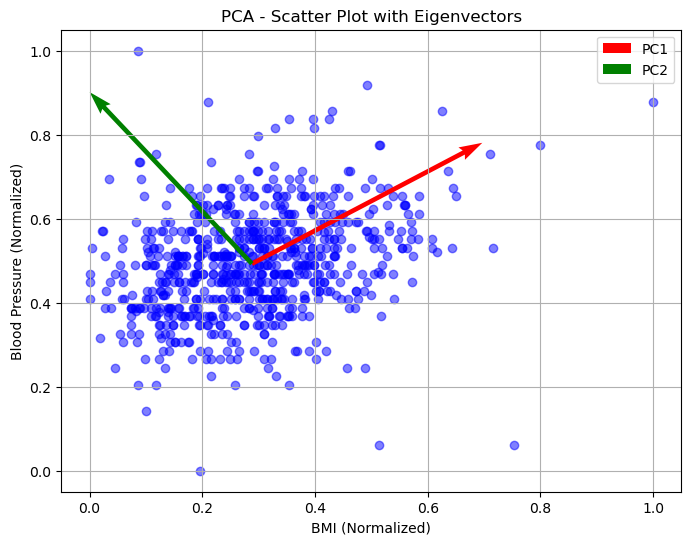

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Perform PCA on the normalized data
pca = PCA(n_components=2)
pca.fit(df_normalized)

# Get the eigenvectors (principal components)
eigenvectors = pca.components_

# Get the mean of the data
mean = np.mean(df_normalized, axis=0)

# Create a scatter plot of the normalized data
plt.figure(figsize=(8, 6))
plt.scatter(df_normalized['BMI_norm'], df_normalized['BloodPressure_norm'], color='blue', alpha=0.5)

# Plot the eigenvectors
# Multiply eigenvectors by a scaling factor (for better visualization)
scaling_factor = 2  # You can adjust the scaling factor for visibility
plt.quiver(mean[0], mean[1], eigenvectors[0, 0], eigenvectors[0, 1], angles='xy', scale_units='xy', scale=scaling_factor, color='red', label='PC1')
plt.quiver(mean[0], mean[1], eigenvectors[1, 0], eigenvectors[1, 1], angles='xy', scale_units='xy', scale=scaling_factor, color='green', label='PC2')

# Labels and title
plt.xlabel('BMI (Normalized)')
plt.ylabel('Blood Pressure (Normalized)')
plt.title('PCA - Scatter Plot with Eigenvectors')

# Show grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()